# Ride Austin New Rider Insights

### Goals
1. Show the Raw Number of New Rides Weekly
2. Show the % of New Rides vs Total Rides Weekly
3. Weekly % of new Riders 
4. Average Number of Transactions Per New Customer In a Week
4. Average Fare Per New Customer Transaction per Week


### Insights
1. On average 24% of total rides are done by new riders per week
2. On average a New Rider has 1.9 Transactions the first week they use the service
3. The average fare for a New Rider is \$15.98 the first week they use the service
4. The average value of a new rider the first week is \$30
5. The average value of a new rider was highest during week 11 at \$54
6. The highest new rider average fare was in week 52 at \$20.84, but below average number of transactions at 1.8


### Assumptions 
1. New Rides dataset includes declines.

In [1]:
#Initialize
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Create full data set by combining the 2 CSV files
df1 = pd.read_csv('Rides_DataA.csv', low_memory=False)
df2 = pd.read_csv('Rides_DataB.csv', low_memory=False)
df = pd.merge(df1,df2,how='inner',on='RIDE_ID')

#Adding Created On column as a date time data type
df['created_on'] = pd.to_datetime(df.created_date, format='%Y-%m-%d')

#Adding a Week column.  This is the Week Number.
df['Week'] = df.created_on.apply(lambda x: x.week)
df['Month'] = df.created_on.apply(lambda x: x.month)

In [2]:
#Creating a new riders dataset. This dataset has all the info when the first time a rider used the service
new_riders_data = df.loc[df.groupby('rider_id')['created_on'].idxmin()]

In [4]:
#Returns the total number of rides by week
weekly_total_riders = df.groupby('Week', sort=False).count()['RIDE_ID']

### Raw Number of New Rides per Week

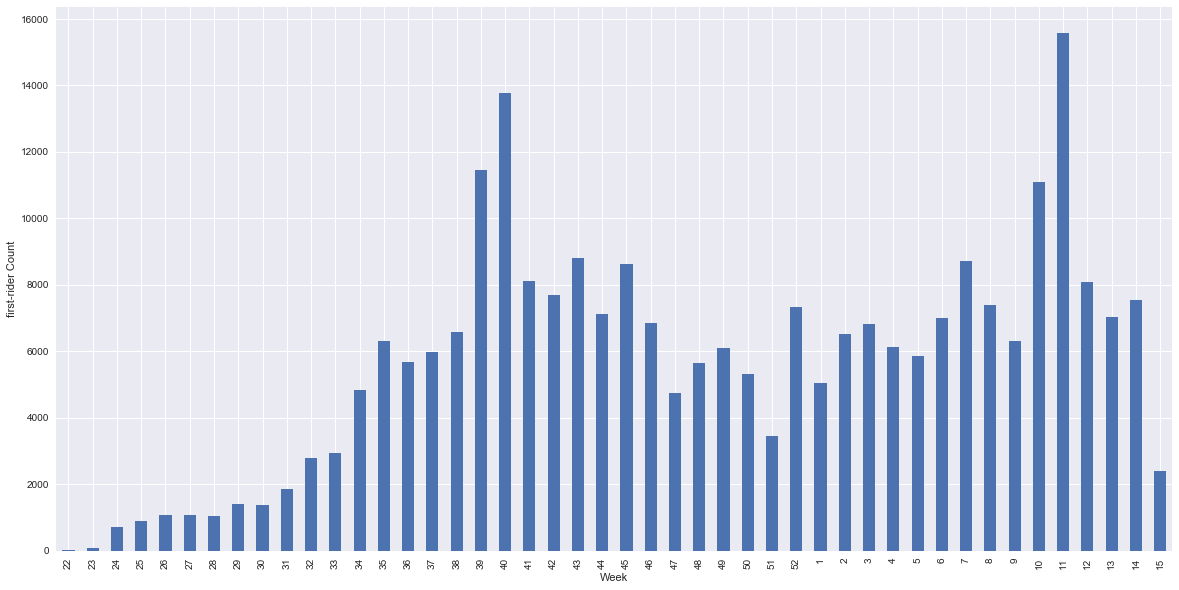

In [3]:
#Create Series
new_riders_weekly_count = new_riders_data.groupby('Week', sort=False).count()['RIDE_ID']

#Create Bar Plot
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
new_riders_weekly_count.plot.bar()
plt.ylabel('first-rider Count')

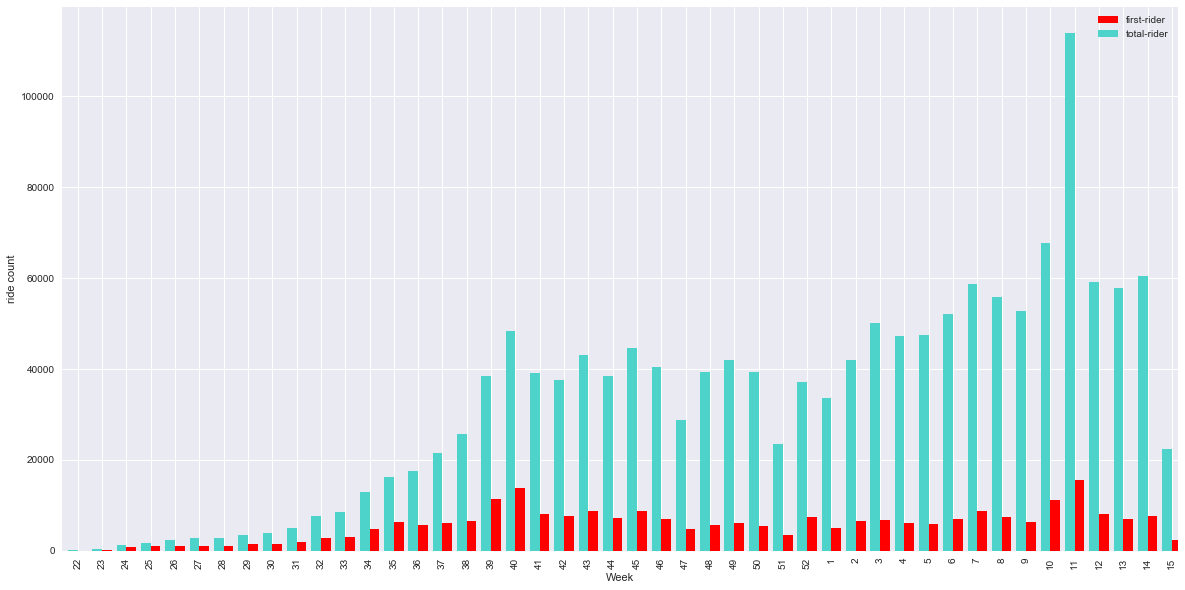

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

new_riders_weekly_count.plot.bar(position=0, width=0.4, color='red', label='first-rider')
weekly_total_riders.plot.bar(position=1, width=0.4, color='#4DD3C9', label='total-rider')
plt.ylabel('ride count')
plt.legend()

### Weekly Percent of New Rides Over Total Rides

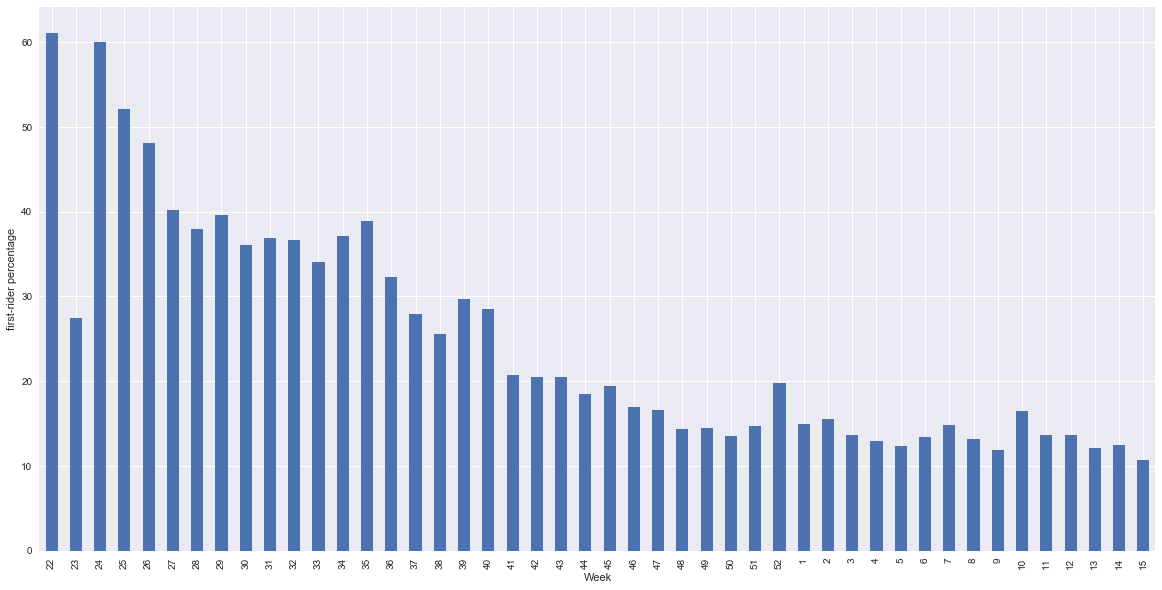

In [8]:
#Combining the weekly numbers of new riders and total rides
weekly_rides = pd.concat([new_riders_weekly_count, weekly_total_riders], axis=1)
weekly_rides.columns = ['first','total']
#Adding the column for percentage
weekly_rides['percentage']=weekly_rides['first']/weekly_rides['total']*100
weekly_rides_percent = weekly_rides['percentage']

#Create plot of Weekly percentage of new rides over total rides
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
weekly_rides_percent.plot.bar()
plt.ylabel('first-rider percentage')

In [154]:
weekly_rides_percent.mean()

24.830420497396922

### Average Number of Transactions & Fare Per New Customer In a Week

In [63]:
test = new_riders_data.head(1000)

#for item in test.itertuples():
    #print (item[18])

In [135]:
#Need new_rider Count.  For every rider ID, how many times the rider used the service that week and the average fare
# series is new_riders_data
def get_average_transactions(series):
    output_week_number = []
    output_mean_count = []
    output_mean_fare = []
    mean_count_dict = {}
    mean_fare_dict = {}
    
    
    
    for item in series.itertuples():
        rider = item[18]
        week_number = item[-2]
        Number_of_rides = df[(df['rider_id']==rider) & (df['Week']==week_number)].count()['RIDE_ID']
        Average_Fare = df[(df['rider_id']==rider) & (df['Week']==week_number)]['total_fare'].mean()
                
        #Simply use the for loop to build a list for each week
        mean_count_dict[week_number] = mean_count_dict.get(week_number, []) + [Number_of_rides]
        mean_fare_dict[week_number] = mean_fare_dict.get(week_number, []) + [Average_Fare]
        
    #Take the average of the count   and return the week number 
    for key, value in mean_count_dict.items():
        average_count = np.mean(pd.Series(np.array(value)))
        output_mean_count.append(average_count)
        output_week_number.append(int(key))
    #Take the average for the fare       
    for key, value in mean_fare_dict.items():
        average_fare = np.mean(pd.Series(np.array(value)))
        output_mean_fare.append(average_fare)
         
   
    return pd.DataFrame({'Week_Number':output_week_number, 
                         'Average_Transactions':output_mean_count, 
                         'Average_Fare':output_mean_fare})
               
weekly_average_transactions = get_average_transactions(new_riders_data)

In [136]:
weekly_average_transactions

,Average_Fare,Average_Transactions,Week_Number
0,12.778788,1.636364,22
1,11.033946,3.081081,23
2,11.405532,1.538462,24
3,12.990540,1.541713,25
4,13.642832,1.550832,26
5,14.321315,1.581784,27
6,14.891074,1.594803,28
7,16.512746,1.528571,29
8,17.480620,1.595885,30
9,16.070342,1.569049,31


In [149]:
#Change Index to be the Week Number to graph
weekly_average_transactions_redex = weekly_average_transactions.set_index('Week_Number')


#### Average Transactions First Week Use Service 

In [141]:
weekly_average_transactions['Average_Transactions'].mean()

1.90728927244696

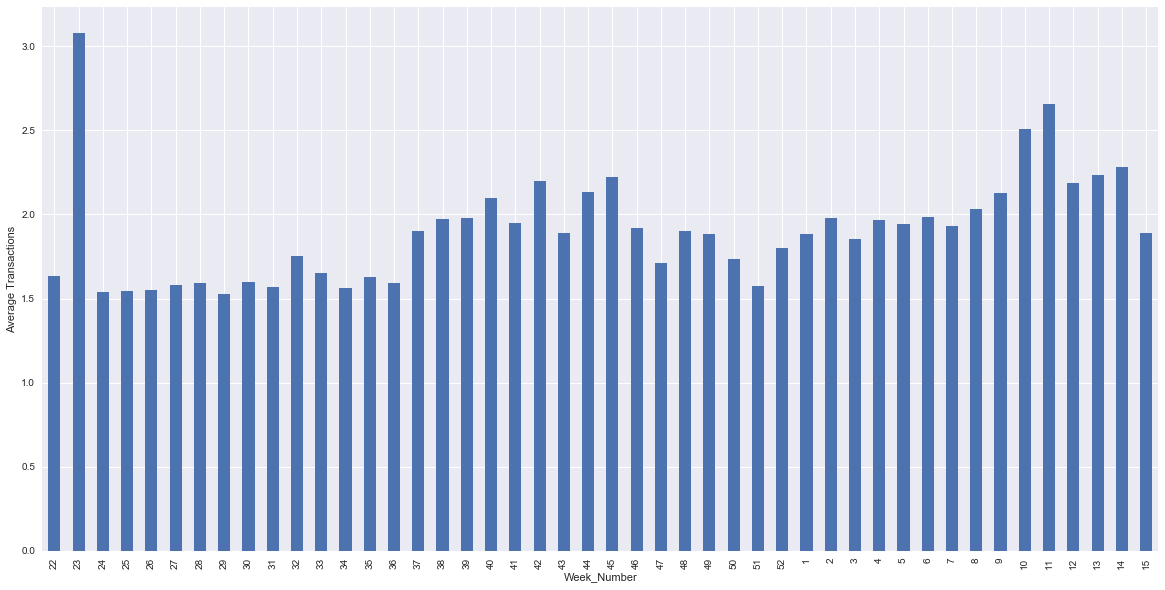

In [138]:
#Create plot of Weekly average transactions of new riders
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
weekly_average_transactions_redex['Average_Transactions'].plot.bar()
plt.ylabel('Average Transactions')

#### Average Fare During First Week of Service

In [140]:
weekly_average_transactions['Average_Fare'].mean()

15.985360971549285

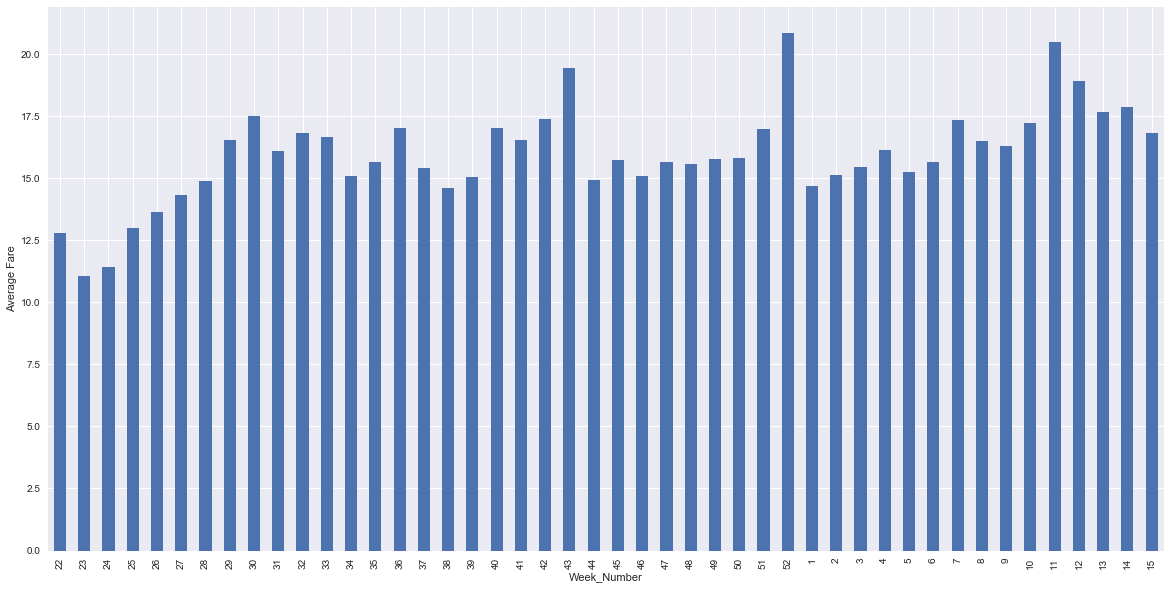

In [139]:
#Create plot of Weekly average fares of new riders
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
weekly_average_transactions_redex['Average_Fare'].plot.bar()
plt.ylabel('Average Fare')

### Revenue

#### Average Value Per New Customer

In [150]:
#Add Average Revenue
weekly_average_transactions_redex['Average_New_Customer_Value']=weekly_average_transactions_redex['Average_Fare']*weekly_average_transactions_redex['Average_Transactions']

In [160]:
#Add Count of New Riders
weekly_average_transactions_redex['Number_of_New_Riders'] = new_riders_weekly_count

In [163]:
#Calculate Revenue
weekly_average_transactions_redex['New_Rider_Revenue'] = weekly_average_transactions_redex['Average_New_Customer_Value']*weekly_average_transactions_redex['Number_of_New_Riders']
weekly_average_transactions_redex

,Average_Fare,Average_Transactions,Average_New_Customer_Value,Number_of_New_Riders,New_Rider_Revenue
Week_Number,,,,,
22,12.778788,1.636364,20.910744,11,230.018182
23,11.033946,3.081081,33.996481,74,2515.739576
24,11.405532,1.538462,17.546972,702,12317.974615
25,12.990540,1.541713,20.027684,899,18004.888318
26,13.642832,1.550832,21.157738,1082,22892.672522
27,14.321315,1.581784,22.653232,1076,24374.878014
28,14.891074,1.594803,23.748325,1039,24674.509267
29,16.512746,1.528571,25.240912,1400,35337.276417
30,17.480620,1.595885,27.897066,1361,37967.906734


In [153]:
#Average New Customer Value
weekly_average_transactions_redex['Average_New_Customer_Value'].mean()

30.58092767744814

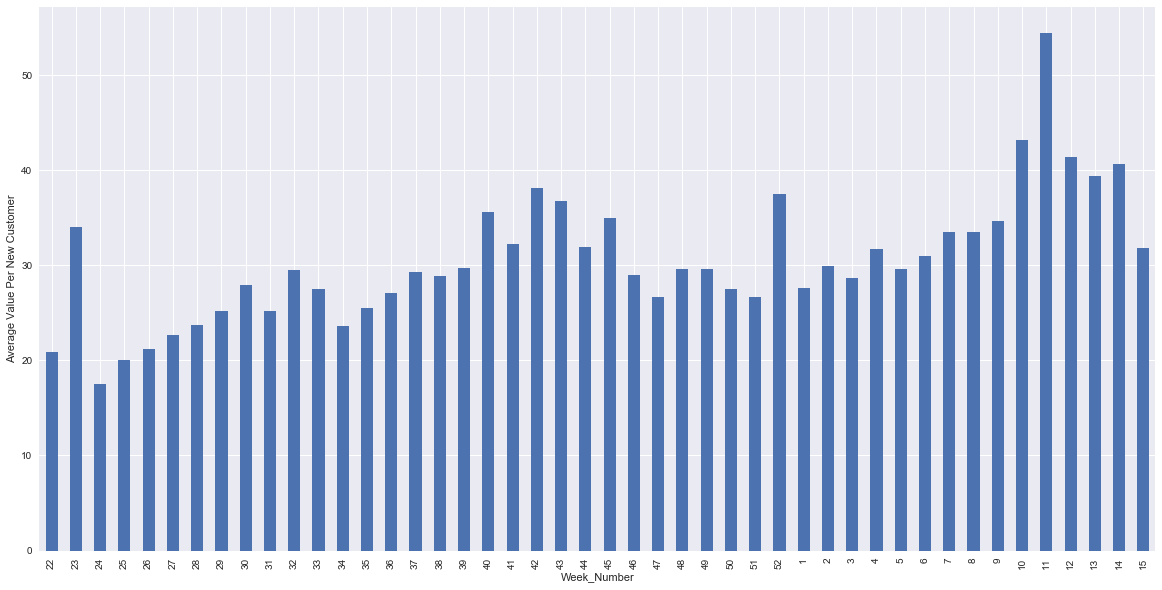

In [146]:
#Create plot of Average New Revenue
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
weekly_average_transactions_redex['Average_New_Customer_Value'].plot.bar()
plt.ylabel('Average Value Per New Customer')